In [1]:
# Import necessary libraries
import pandas as pd
import spacy
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pickle


OSError: OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a Python package or a valid path to a data directory.

In [2]:
!pip install https://huggingface.co/spacy/en_core_web_lg/resolve/main/en_core_web_lg-any-py3-none-any.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 662.2 kB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
nlp = spacy.load("en_core_web_lg")

In [6]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
# Define a function to preprocess text
def preprocess_text(text):
    # Create a spaCy document object
    doc = nlp(text)

    # Clean the text by removing stop words, punctuation, and non-alphabetic characters
    clean = []
    for token in doc:
        if not token.is_stop and not token.is_punct and token.is_alpha:
            clean.append(token.lemma_.lower())
    # Return the cleaned text as a string
    return " ".join(clean)

In [8]:
df['Resume_text'] = df['Resume'].apply(preprocess_text)

In [9]:
df

,Category,Resume,Resume_text
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail uit rgpv data scientist data ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skill proficient ms office word basic...
958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenge positive thinking...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skill quick learner eagerness learn n...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skill software knowledge ms power poi...


In [10]:
label_encoder = LabelEncoder()

In [11]:
df['Category_Encoded'] = label_encoder.fit_transform(df['Category'])

In [12]:
df.head()

,Category,Resume,Resume_text,Category_Encoded
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail uit rgpv data scientist data ...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,6


In [13]:
df[['Category', 'Category_Encoded']].value_counts()

Category Category_Encoded
Java Developer 15 84
Testing 23 70
DevOps Engineer 8 55
Python Developer 20 48
Web Designing 24 45
HR 12 44
Hadoop 13 42
Data Science 6 40
Operations Manager 18 40
Sales 22 40
Blockchain 3 40
ETL Developer 10 40
Mechanical Engineer 16 40
Arts 1 36
Database 7 33
Electrical Engineering 11 30
Health and fitness 14 30
PMO 19 30
Business Analyst 4 28
DotNet Developer 9 28
Automation Testing 2 26
Network Security Engineer 17 25
SAP Developer 21 24
Civil Engineer 5 24
Advocate 0 20
dtype: int64

In [14]:
df.Category_Encoded.value_counts()

15 84
23 70
8 55
20 48
24 45
12 44
13 42
3 40
10 40
18 40
6 40
22 40
16 40
1 36
7 33
11 30
14 30
19 30
4 28
9 28
2 26
17 25
21 24
5 24
0 20
Name: Category_Encoded, dtype: int64

In [15]:
df.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [16]:
df.Resume_text[0]

'skill programming language python panda numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm bayes knn random forest decision trees boost technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualization mysql sqlserver cassandra hbase elasticsearch plotly kibana matplotlib ggplot tableau regular expression html css angular logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details exprience month exprience month exprience monthscompany detail company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assist accelerate review process run analytic generate report core member team help develop automated review p

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['Resume_text'], df['Category_Encoded'], test_size=0.20, random_state=2, stratify=df['Category'])

In [21]:
model =Pipeline([('vectorizer', TfidfVectorizer()), ('model', KNeighborsClassifier())])

In [22]:
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
 ('model', KNeighborsClassifier())]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('vectorizer', TfidfVectorizer()),
 ('model', KNeighborsClassifier())]) TfidfVectorizer TfidfVectorizer() KNeighborsClassifier KNeighborsClassifier()

In [23]:
y_pred = model.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.73      1.00      0.84         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       0.90      1.00      0.95         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00         8
          17       1.00    

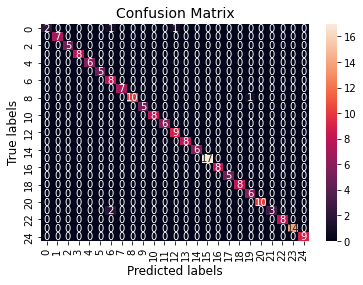

In [25]:
# Compute and display the confusion matrix
cm_matrix = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm_matrix, annot=True, ax=ax)

ax.set_xlabel('Predicted labels', fontsize=12)
ax.set_ylabel('True labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)

plt.show()

In [26]:
print(accuracy_score(y_test,y_pred))

0.9740932642487047


In [27]:
with open('model_res.pkl', 'wb') as f:
     pickle.dump(model, f)